In [3]:
# creating almost linear data
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3*np.random.randn(100, 1)

Reference: Normal Equations (Solution for single feature model)

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[3.5462839 ],
       [0.71753941]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.5462839 ],
       [4.98136272]])

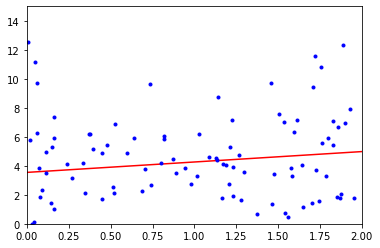

In [7]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Computing the same using scikit learn

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.5462839]), array([[0.71753941]]))

In [9]:
lin_reg.predict(X_new)

array([[3.5462839 ],
       [4.98136272]])

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.5462839 ],
       [0.71753941]])

# Gradient Descent

In [11]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

In [12]:
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[3.5462839 ],
       [0.71753941]])

# Stochastic gradient descent

In [13]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

In [14]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [15]:
theta

array([[3.50800853],
       [0.74452988]])